## 7. Inferential Statistics

https://www.data-to-viz.com/

    
### How much data do we have??

**~38_500 clothing items without NA's**:

* Classified in **616 brands** -filtering types with > 10 products
* Classified in **8 types** -filtering types with > 410 products
* Classified in **16 colors** -filtering colors with > 1100 products


### Data distribution (evaluated in 6.clothes_EDA.ipynb)

* We only have one continuous variable (price_pack) so we **do not need to scale the data** <br/>
* I will **not drop outliers** since it is expected to find overwhelming prices in high class brands


** Using parametric tests in non-normal data:**

Our data is close but not-normally distributed, should we use ANOVA and t-tests?

Fortunately, an ANOVA is not very sensitive to moderate deviations from normality; simulation studies, using a variety of non-normal distributions, have shown that the false positive rate is not affected very much by this violation of the assumption (Glass et al. 1972, Harwell et al. 1992, Lix et al. 1996). This is because when you take a large number of random samples from a population, the means of those samples are approximately normally distributed even when the population is not normal.

Just about every parametric statistical test has a non-parametric substitute, such as the **Kruskal–Wallis test instead of a one-way anova, Wilcoxon signed-rank test instead of a paired t-test, and Spearman rank correlation instead of linear regression**. These non-parametric tests do not assume that the data fit the normal distribution. They do assume that the data in different groups have the same distribution as each other, however; if different groups have different shaped distributions (for example, one is skewed to the left, another is skewed to the right), a non-parametric test may not be any better than a parametric one.


I evaluated the normality using shapiro and according to the results, applied t-test or wilcoxon

### 0. Import modules and load data

In [1]:
# data manipualtion basics
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # ignorar warnings

# plotting
import seaborn as sns  # esta basada en matplotlib
import pylab as plt  # libreria basica para pintar
#import matplotlib.pyplot as plt
from matplotlib_venn import venn2

plt.rcParams['figure.figsize']=(8, 6)  # tamaño por defecto, decenas de pixeles

%matplotlib inline

## my own functions
from src import dataanalysis_fun1 as eda # Import my module


### STATISTICS
from scipy import stats

# ols = minimos cuadrados ordinarios, regresion lineal - anovas
import statsmodels.api as sm
from statsmodels.formula.api import ols

# chi test -independence
from scipy.stats import f_oneway, norm, f, chi2, chi2_contingency

# mean difference tests
from scipy.stats import shapiro
from scipy.stats import t
from scipy.stats import ttest_1samp 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu


In [2]:
clothes=pd.read_csv("../data/clean/clothes_simple.csv")

In [6]:
clothes.head()

,product_id,brand_class,colour,gender,type,price_pack
0,1,middle,beige,men,sweater,36.19
1,2,middle,beige,men,sweater,45.40
2,3,middle,beige,men,sweater,49.94
3,4,middle,beige,men,sweatshirt,62.44
4,5,middle,brown,men,sweater,62.44


## 1. Is there a **correlation** between the brand **average pricing** <br/> and the **number of colors** of their item collection??

### Simple linear regression - available in Seaborn plot


NO, THERE IS NOT

## 2. Significantly popular colors in men and women clothing

### $\chi^2$ chi-cuadrado - Test of independence

* H0: Color of the clothing and the gender to whom is directed are **independent** <br/>
* H1: Color of the clothing and the gender to whom is directed are **dependent** <br/>



RESIDUALS:

Th residuals indicate the **extent to which observed counts differ from the expected counts** if there were no association between the variables. <br/> *Residual = (Observed - Expected) / sqrt(Expected)*

These residuals help in identifying which cells contribute the most to the chi-squared statistic

In [ ]:
wo_colortype_df=clothes[clothes["gender"]=="women"].pivot_table(columns="type", index="colour",  aggfunc="size", fill_value=0)
wo_colortype_df["total"]=wo_colortype_df.sum(axis=1)

me_colortype_df=clothes[clothes["gender"]=="men"].pivot_table(columns="type", index="colour",  aggfunc="size", fill_value=0)
me_colortype_df["total"]=me_colortype_df.sum(axis=1)

column_list=wo_colortype_df.columns[:-1]

### 2.1 All clothing types together

In [38]:
contig=pd.concat([wo_colortype_df["total"], me_colortype_df["total"]], axis=1)
contig.columns=["women", "men"]
chi2, pval, dof, ex= chi2_contingency(contig)

obs_exp_df=(np.array(contig)-ex ) / ex ** 0.5

obs_exp_df=pd.DataFrame(obs_exp_df)
obs_exp_df.columns=["women", "men"]
obs_exp_df.index=contig.index

obs_exp_df=obs_exp_df.sort_values("men", ascending=False)
obs_exp_df, pval

(                women        men
 colour                          
 gray        -5.058031   6.844313
 turquoise   -3.709310   5.019281
 red         -3.237931   4.381431
 yellow      -2.974042   4.024347
 orange      -2.159362   2.921957
 purple      -1.858582   2.514954
 white       -1.421021   1.922866
 blue        -1.378396   1.865188
 brown       -0.916037   1.239542
 beige       -0.567839   0.768375
 gold        -0.197723   0.267550
 pink         1.532851  -2.074190
 green        1.821887  -2.465300
 black        6.604352  -8.936729
 multicolor  13.277233 -17.966188,
 1.0440856006458361e-170)

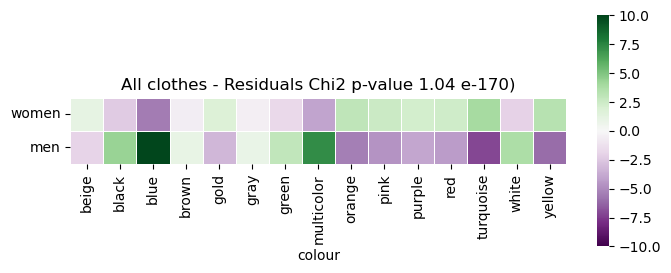

In [88]:
figsize=(12, 6)  # 1 row, 2 columns for side-by-side plots

#vmin = min(wo_mat.min().min(), me_mat.min().min())
#vmax = max(wo_mat.max().max(), me_mat.max().max())

vmin = -10
vmax = 10

heatmap1=sns.heatmap(obs_exp_df.T,
            cmap='PRGn',
            center=0,
            square=True,
            annot=False,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5},  vmin=vmin,vmax=vmax)
heatmap1.set_title('All clothes - Residuals Chi2 p-value 1.04 e-170)');

### 2.2 Significantly popular colors based on clothing `type` T-SHIRT ONLY



In [84]:
contig=pd.concat([wo_colortype_df["tshirt"], me_colortype_df["tshirt"]], axis=1)
contig.columns=["women", "men"]
chi2, pval, dof, ex= chi2_contingency(contig)

obs_exp_df=(np.array(contig)-ex ) / ex ** 0.5

obs_exp_df=pd.DataFrame(obs_exp_df)
obs_exp_df.columns=["women", "men"]
obs_exp_df.index=contig.index

tshirt_obs_exp_df=obs_exp_df.sort_values("men", ascending=False)
obs_exp_df, pval

(               women       men
 colour                        
 beige       1.117654 -2.012178
 black      -2.409466  4.337905
 blue       -5.498350  9.899005
 brown      -0.550419  0.990952
 gold        1.794598 -3.230921
 gray       -0.494784  0.890790
 green      -1.643677  2.959209
 multicolor -4.000038  7.201505
 orange      3.006432 -5.412658
 pink        2.563202 -4.614685
 purple      2.211458 -3.981420
 red         2.403457 -4.327087
 turquoise   3.976926 -7.159896
 white      -2.073633  3.733284
 yellow      3.358915 -6.047253,
 2.391339133415867e-97)

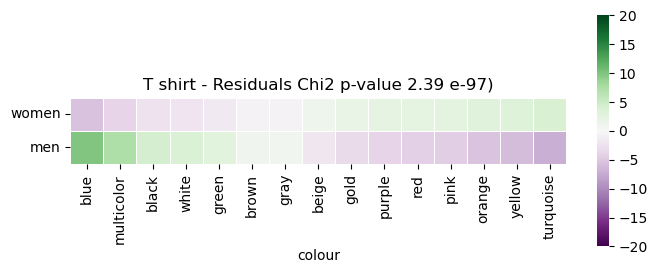

In [87]:
figsize=(12, 6)  # 1 row, 2 columns for side-by-side plots

#vmin = min(wo_mat.min().min(), me_mat.min().min())
#vmax = max(wo_mat.max().max(), me_mat.max().max())

vmin = -20
vmax = 20

heatmap1=sns.heatmap(tshirt_obs_exp_df.T,
            cmap='PRGn',
            center=0,
            square=True,
            annot=False,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5},  vmin=vmin,vmax=vmax)
heatmap1.set_title('T shirt - Residuals Chi2 p-value 2.39 e-97)');

In [144]:
# FOR WOMEN

wo_colortype_df2=wo_colortype_df.drop("total", axis=1)

allcolor_list=clothes["colour"].unique()
types_list=clothes["type"].unique()

chi_pvalues_df2=pd.DataFrame()
chi_obsexp_df2=pd.DataFrame()

for typ in types_list: # for each clothing type
# create a df 
    chi_pvalues_df=pd.DataFrame(index=allcolor_list, columns=[typ])
    chi_obsexp_df=pd.DataFrame(index=allcolor_list, columns=[typ])

    for col in allcolor_list: # for each color
        # col x, type y
        A1=wo_colortype_df2[[typ]][wo_colortype_df2.index==col]
        A1=A1.iloc[0,0]
        # col x, not-type y
        B1=wo_colortype_df2.drop(typ, axis=1)[wo_colortype_df2.index==col].sum(axis=1)
        # not-col x, type y
        A2=sum(np.array(wo_colortype_df2[[typ]][wo_colortype_df2.index!=col]))[0]
        # not not
        B2=wo_colortype_df2.drop(typ, axis=1)[wo_colortype_df2.index!=col].sum(axis=1).sum(axis=0)
        
        #####
        cross_df = pd.DataFrame(index=["type_X", "other"], columns=["col_X", "other"])
        cross_df.iloc[0,]=[A1, int(A2)]
        cross_df.iloc[1,]=[int(B1), int(B2)]
        
        try:
            #Chi-square test of independence of variables in a contingency table.
            ji_dos, pval, dof, ex = chi2_contingency(cross_df) 
            
            #The expected frequencies
            ex_cross_df=pd.DataFrame(ex, index=["type_X", "other"], columns=["col_X", "other"]) 
            
            chi_pvalues_df[chi_pval_df.index==col]= pval
            chi_obsexp_df[chi_pval_df.index==col]=(cross_df["col_X"][0]-ex_cross_df["col_X"][0])/ex_cross_df["col_X"][0]**0.5
        except:
            chi_pvalues_df[chi_pval_df.index==col]= 1
            chi_obsexp_df[chi_pval_df.index==col]= 0

    chi_pvalues_df2 = pd.concat([chi_pvalues_df2, chi_pvalues_df], axis=1)
    chi_obsexp_df2 = pd.concat([chi_obsexp_df2, chi_obsexp_df], axis=1)

    
#this prints only significant cells
wo_chi_pvalues_df = chi_pvalues_df2 <= 0.0001
wo_mat=chi_obsexp_df2[wo_chi_pvalues_df]
wo_mat.fillna(0, inplace=True)

In [145]:
# FOR MEN

me_colortype_df2=me_colortype_df.drop("total", axis=1)

allcolor_list=clothes["colour"].unique()
types_list=clothes["type"].unique()

chi_pvalues_df2=pd.DataFrame()
chi_obsexp_df2=pd.DataFrame()

for typ in types_list: # for each clothing type
# create a df 
    chi_pvalues_df=pd.DataFrame(index=allcolor_list, columns=[typ])
    chi_obsexp_df=pd.DataFrame(index=allcolor_list, columns=[typ])

    for col in allcolor_list: # for each color
        # col x, type y
        A1=me_colortype_df2[[typ]][me_colortype_df2.index==col]
        A1=A1.iloc[0,0]
        # col x, not-type y
        B1=me_colortype_df2.drop(typ, axis=1)[me_colortype_df2.index==col].sum(axis=1)
        # not-col x, type y
        A2=sum(np.array(me_colortype_df2[[typ]][me_colortype_df2.index!=col]))[0]
        # not not
        B2=me_colortype_df2.drop(typ, axis=1)[me_colortype_df2.index!=col].sum(axis=1).sum(axis=0)
        
        #####
        cross_df = pd.DataFrame(index=["type_X", "other"], columns=["col_X", "other"])
        cross_df.iloc[0,]=[A1, int(A2)]
        cross_df.iloc[1,]=[int(B1), int(B2)]
        
        try:
            #Chi-square test of independence of variables in a contingency table.
            ji_dos, pval, dof, ex = chi2_contingency(cross_df) 
            
            #The expected frequencies
            ex_cross_df=pd.DataFrame(ex, index=["type_X", "other"], columns=["col_X", "other"]) 
            
            chi_pvalues_df[chi_pval_df.index==col]= pval
            chi_obsexp_df[chi_pval_df.index==col]=(cross_df["col_X"][0]-ex_cross_df["col_X"][0])/ex_cross_df["col_X"][0]**0.5
        except:
            chi_pvalues_df[chi_pval_df.index==col]= 1
            chi_obsexp_df[chi_pval_df.index==col]= 0

    chi_pvalues_df2 = pd.concat([chi_pvalues_df2, chi_pvalues_df], axis=1)
    chi_obsexp_df2 = pd.concat([chi_obsexp_df2, chi_obsexp_df], axis=1)

    
#this prints only significant cells
me_chi_pvalues_df = chi_pvalues_df2 <= 0.0001
me_mat=chi_obsexp_df2[me_chi_pvalues_df]
me_mat.fillna(0, inplace=True)

In [152]:
cross_df

,col_X,other
type_X,60,426
other,476,12384


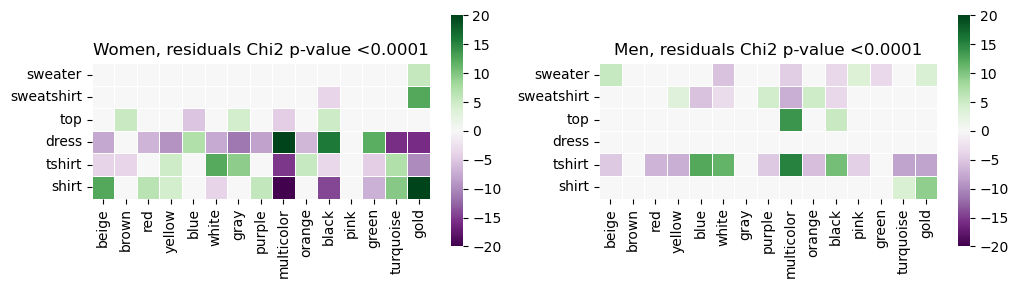

In [151]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns for side-by-side plots

#vmin = min(wo_mat.min().min(), me_mat.min().min())
#vmax = max(wo_mat.max().max(), me_mat.max().max())

vmin = -20
vmax = 20

heatmap1=sns.heatmap(wo_mat.T,
            cmap='PRGn',
            center=0,
            square=True,
            annot=False,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5}, vmin=vmin,vmax=vmax,  ax=axes[0])
heatmap1.set_title('Women, residuals Chi2 p-value <0.0001')

heatmap2=sns.heatmap(me_mat.T,
            cmap='PRGn',
            center=0,
            square=True,
            annot=False,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5},vmin=vmin,vmax=vmax,  ax=axes[1])
heatmap2.set_title('Men, residuals Chi2 p-value <0.0001')

plt.show();

## 3. Which is the most influencing factor in clothing prices: gender or color?

Is there a significant difference in average price between men and women **t-shirts**? <br/>
Due to sample size limitations, we can only evaluate t-shirts

To avoid misleading conclusions, we must **compare** the clothing `prices` within each `brand class`<br/>

### TWO-WAY ANOVA

Two independent categorical variables (gender, colour) and one dependent continous variable (tshirt price). 

$H0 : \mu_1=\mu_2=\ldots=\mu_n$  (no sig diff in price) <br/>
$H1 :$ A at least one sig diff in price


SUM_SQ values:

Interpreting the sum_sq values involves comparing them to the total variability in the data and other factors in the model. A higher sum_sq value relative to others or a large sum_sq relative to the total sum_sq indicates that the corresponding factor explains a significant portion of the variability in the price_pack

### Discard price outliers by type

Price values > 4 standard deviations


In [112]:
type_list=list(clothes["type"].unique())
type_list

['sweater', 'sweatshirt', 'top', 'dress', 'tshirt', 'shirt']

In [116]:
clothes1=pd.DataFrame()
for typ in type_list:
    temp=clothes[clothes["type"]==typ]
    data=temp["price_pack"]
    z_scores = (data - data.mean()) / data.std() #Calculate Z-Scores for numerical columns
    threshold = 4 # Define a threshold (4 standard deviations)
    clothes1=clothes1.append(temp[np.abs(z_scores) < threshold]) # Exclude outliers


## 3.1 Which gender is more expensive?

### Two-sample, one-sided Mann-Whitney U test

In [143]:
men_price=clothes1["price_pack"][(clothes1["gender"]=="men")& (clothes1["type"]=="tshirt")]
women_price=clothes1["price_pack"][(clothes1["gender"]=="women")& (clothes1["type"]=="tshirt")]

shapiro(men_price).pvalue, shapiro(women_price).pvalue

# Perform one-sided Mann-Whitney U test
statistic, p_value = mannwhitneyu(men_price, women_price, alternative='greater')

men_price.mean(), women_price.mean(), p_value

(27.209482157957133, 23.628514549243437, 2.7274038754036104e-10)

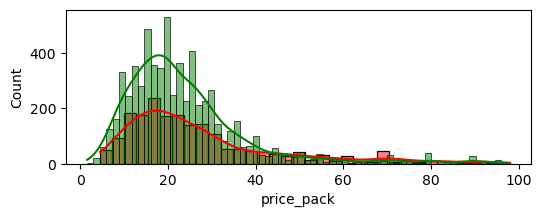

In [156]:
plt.figure(figsize=(6, 2))
sns.histplot(data=clothes1[(clothes1["gender"]=="men")& (clothes1["type"]=="tshirt")], x="price_pack", color="red", label="men", kde=True)#.set_xlim(0, 200)
sns.histplot(data=clothes1[(clothes1["gender"]=="women")& (clothes1["type"]=="tshirt")],x="price_pack", color="green", label="women", kde=True);#.set_xlim(0, 200)

In [119]:
## high class

df=clothes1[(clothes1["brand_class"]=="high") & (clothes1["type"]=="tshirt")]
df=df[["colour", "gender", "price_pack"]]

formula = 'price_pack ~ gender + colour'
modelo = ols(formula, df).fit()
anova = sm.stats.anova_lm(modelo, typ=2)     # typ=2 significa two way
total_sum_sq = anova.loc['Residual', 'sum_sq']
anova['variance_proportion'] = anova['sum_sq'] / total_sum_sq
display(modelo.f_pvalue)
anova

2.2839121639835702e-09

,sum_sq,df,F,PR(>F),variance_proportion
gender,1957.716102,1.0,5.186900,2.285432e-02,0.002381
colour,23422.152968,14.0,4.432583,6.774265e-08,0.028492
Residual,822052.836644,2178.0,NaN,NaN,1.000000


In [120]:
## middle class

df=clothes1[(clothes1["brand_class"]=="middle") & (clothes1["type"]=="tshirt")]
df=df[["colour", "gender", "price_pack"]]

formula = 'price_pack ~ gender + colour'
modelo = ols(formula, df).fit()
anova = sm.stats.anova_lm(modelo, typ=2)     # typ=2 significa two way
total_sum_sq = anova.loc['Residual', 'sum_sq']
anova['variance_proportion'] = anova['sum_sq'] / total_sum_sq
display(modelo.f_pvalue)
anova #the variables has a statistically significant effect on the dependent variable.
anova

6.542349482241732e-08

,sum_sq,df,F,PR(>F),variance_proportion
gender,4826.442649,1.0,41.136740,1.652973e-10,0.014264
colour,2564.845268,14.0,1.561478,8.231413e-02,0.007580
Residual,338370.530924,2884.0,NaN,NaN,1.000000


In [121]:
## low class

df=clothes1[(clothes1["brand_class"]=="low") & (clothes1["type"]=="tshirt")]
df=df[["colour", "gender", "price_pack"]]

formula = 'price_pack ~ gender + colour'
modelo = ols(formula, df).fit()
anova = sm.stats.anova_lm(modelo, typ=2)     # typ=2 significa two way
total_sum_sq = anova.loc['Residual', 'sum_sq']
anova['variance_proportion'] = anova['sum_sq'] / total_sum_sq
display(modelo.f_pvalue)
anova

1.777976901461362e-11

,sum_sq,df,F,PR(>F),variance_proportion
gender,355.322281,1.0,8.878980,2.905520e-03,0.002659
colour,2987.013583,14.0,5.331505,3.683000e-10,0.022354
Residual,133621.324689,3339.0,NaN,NaN,1.000000


### ONE-WAY ANOVA . Does the color influences the price of clothing?

* Once we find that both color and gender influence the clothing prices, <br/> 
we will dig in color influence in men and women clothing independently.<br/>
Again, this decision is due to sample size limitations. <br/>
<br/>
* Notwithstanding, now that we split the analysis for men and women, <br/>
we can evaluate whether the color inlfuences the item prices in the different types of clothing.

Compare the `color` influence on `prices` :
   * By brand class
   * By type of clothing
   * By gender

In [157]:
df=clothes1[clothes1["gender"]=="women"]
df["type"].unique()

array(['sweater', 'sweatshirt', 'top', 'dress', 'tshirt', 'shirt'],
      dtype=object)

In [168]:
classes_list=clothes1["brand_class"].unique()
types_list=clothes1["type"].unique()

anova_res = pd.DataFrame(columns=["type", "brand_class", "pval", "residue"])

# FOR WOMEN
for cla in classes_list:
    for typ in types_list:
        df=clothes1[clothes1["gender"]=="women"]
        try:
            df=df[(df["brand_class"]==cla) & (df["type"]==typ)]
            df=df[["colour", "price_pack"]]
            formula = 'price_pack ~ colour'
            modelo = ols(formula, df).fit()
            anova = sm.stats.anova_lm(modelo, typ=1)     # typ=1 significa one way
            
            total_sum_sq = anova.loc['Residual', 'sum_sq']
            residue=anova['variance_proportion'] = anova['sum_sq'] / total_sum_sq
            
            anova_res.loc[len(anova_res)] = [typ, cla, round(modelo.f_pvalue, ndigits=10), residue[0]] 
        except:
            anova_res.loc[len(anova_res)] =[typ, cla, 1, 0]
            
wo_sign_anova=anova_res[anova_res["pval"]<0.0001].sort_values("pval")

In [169]:
wo_sign_anova

,type,brand_class,pval,residue
9,dress,low,0.000000e+00,0.020195
11,shirt,low,0.000000e+00,0.095414
5,shirt,middle,1.000000e-10,0.029324
16,tshirt,high,9.000000e-10,0.049887
10,tshirt,low,6.738900e-06,0.019160
2,top,middle,1.404000e-05,0.050544
3,dress,middle,2.848430e-05,0.024628
7,sweatshirt,low,9.582380e-05,0.263030


In [170]:
classes_list=clothes1["brand_class"].unique()
types_list=clothes1["type"].unique()

anova_res = pd.DataFrame(columns=["type", "brand_class", "pval", "residue"])

# FOR MEN
for cla in classes_list:
    for typ in types_list:
        df=clothes1[clothes1["gender"]=="men"]
        try:
            df=df[(df["brand_class"]==cla) & (df["type"]==typ)]
            df=df[["colour", "price_pack"]]
            formula = 'price_pack ~ colour'
            modelo = ols(formula, df).fit()
            anova = sm.stats.anova_lm(modelo, typ=1)     # typ=1 significa one way

            total_sum_sq = anova.loc['Residual', 'sum_sq']
            residue=anova['variance_proportion'] = anova['sum_sq'] / total_sum_sq
            
            anova_res.loc[len(anova_res)] = [typ, cla, round(modelo.f_pvalue, ndigits=10), residue[0]] 
        except:
            anova_res.loc[len(anova_res)] =[typ, cla, 1, 0]

        
me_sign_anova=anova_res[anova_res["pval"]<0.0001].sort_values("pval")

In [171]:
me_sign_anova["gender"]="men"
wo_sign_anova["gender"]="women"

sign_anova=pd.concat([me_sign_anova, wo_sign_anova], axis=0)

In [172]:
sign_anova["type"].unique()

array(['sweater', 'sweatshirt', 'tshirt', 'top', 'dress', 'shirt'],
      dtype=object)

In [180]:
sign_anova=sign_anova.sort_values("residue", ascending=False)
sign_anova

,type,brand_class,pval,residue,gender
8,top,low,1.176170e-05,0.564772,men
7,sweatshirt,low,9.582380e-05,0.263030,women
6,sweater,low,0.000000e+00,0.117236,men
11,shirt,low,0.000000e+00,0.095414,women
10,tshirt,low,4.209000e-07,0.082592,men
0,sweater,middle,0.000000e+00,0.065967,men
7,sweatshirt,low,0.000000e+00,0.050890,men
2,top,middle,1.404000e-05,0.050544,women
16,tshirt,high,9.000000e-10,0.049887,women
1,sweatshirt,middle,0.000000e+00,0.031926,men


A residual of 0.5, when dealing with an average price of 25 euros, represents a difference of 0.5 euros from the expected value. In relative terms, this difference is around 2% of the average price (0.5 euros / 25 euros * 100).

### t-test: Which is the most expensive color?

For those items we found statistical differences in pricing according to the color (0.0001), <br/>
lets find which are indeed the most expensive colors

H0: Color X is not more expensive than Y

In [176]:
## COLOR CODES MATCH THE COLOR LABEL
colors_dict = {
    'brown': '#800000',
    'red': '#FF0000',
    'yellow': '#FFFF00',
    'blue': '#0000FF',
    'beige': '#F5F5DC',
    'white': '#FFFFFF',
    'gray': '#808080',
    'purple': '#800080',
    'multicolor': '#FF00FF',  # Specifying a different color for 'multicolor'
    'orange': '#FFA500',
    'black': '#000000',
    'pink': '#FFC0CB',
    'green': '#008000',
    'turquoise': '#40E0D0',
    'gold': '#FFD700'
}

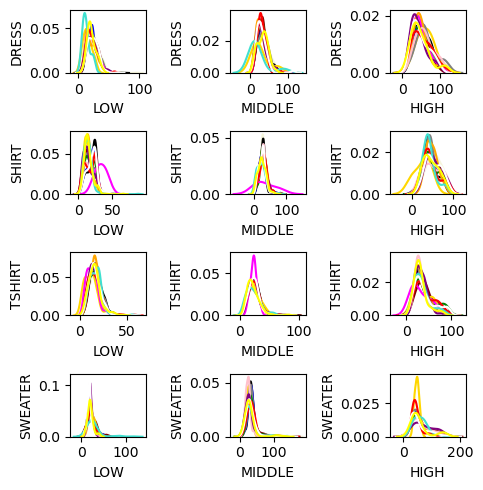

In [177]:
fig, ax = plt.subplots(4, 3, figsize=(5, 5))
classes_list=["low", "middle", "high"]
types_list=["dress", "shirt", "tshirt", "sweater"]

for j in range(len(types_list)):
    
    for i in range(len(classes_list)):
        df = clothes1[(clothes1["brand_class"] == classes_list[i]) & (clothes1["type"] == types_list[j])]

        for color, data in df.groupby('colour'):
            sns.kdeplot(data=data['price_pack'], label=color, color=colors_dict.get(color), ax=ax[j,i])
        ax[j,i].set_xlabel(classes_list[i].upper())
        ax[j,i].set_ylabel(types_list[j].upper())
    
plt.tight_layout()
plt.show()


In [181]:
sign_anova.head()

,type,brand_class,pval,residue,gender
8,top,low,1.176170e-05,0.564772,men
7,sweatshirt,low,9.582380e-05,0.263030,women
6,sweater,low,0.000000e+00,0.117236,men
11,shirt,low,0.000000e+00,0.095414,women
10,tshirt,low,4.209000e-07,0.082592,men


In [192]:
t_wilcx_test_res = pd.DataFrame(columns=["type", "brand_class", "gender", "colour", "test", "pval", "diff"])

allcolors=list(clothes["colour"].unique())

for i in range(len(sign_anova)):
    
    typ=sign_anova["type"].iloc[i]
    cla=sign_anova["brand_class"].iloc[i]
    gen=sign_anova["gender"].iloc[i]

    df = clothes1[(clothes1["brand_class"] == cla) & (clothes1["type"] == typ) &(clothes1["gender"] == gen)]
    
    for col in allcolors:
        
        # ensure a minimum sample size
        
        if (len(df[df["colour"]==col]) >= 20):
        
            mu=df["price_pack"].mean()
            
            # Do not reject Ho, i.e., NORMAL - T-test
            if(shapiro(df["price_pack"]).pvalue >= 0.05): 
                test = ttest_1samp(df[df["colour"]==col]["price_pack"], mu, alternative='greater').pvalue
                diff = df[df["colour"] == col]["price_pack"].mean()-mu
                t_wilcx_test_res.loc[len(t_wilcx_test_res)] =[typ, cla, gen, col, "ttest", test, diff]

            # We reject Ho, i.e., NON-NORMAL - Wilcoxon            
            else: 
                test = wilcoxon(df[df["colour"] == col]["price_pack"]-mu, alternative='greater').pvalue
                diff = df[df["colour"] == col]["price_pack"].mean()-mu
                t_wilcx_test_res.loc[len(t_wilcx_test_res)] =[typ, cla, gen, col, "wilcox", test, diff]
        
        else:
            
            t_wilcx_test_res.loc[len(t_wilcx_test_res)] =[typ, cla, gen, col, "none", 1, 0]
    
    
t_wilcx_test_res=t_wilcx_test_res[t_wilcx_test_res["pval"]<0.05]

In [193]:
t_wilcx_test_res.sort_values(["gender", "colour"])
t_wilcx_test_res["colour"].unique()

array(['beige', 'gold', 'red', 'blue', 'white', 'black', 'pink', 'brown',
       'purple', 'green'], dtype=object)

In [195]:
t_wilcx_test_res.sort_values("diff", ascending=False)

,type,brand_class,gender,colour,test,pval,diff
124,tshirt,high,women,blue,wilcox,0.044568,5.0679
165,dress,middle,women,beige,wilcox,0.011886,4.143314
55,shirt,low,women,black,wilcox,0.0,3.797227
112,top,middle,women,purple,wilcox,0.024735,3.717819
49,shirt,low,women,blue,wilcox,0.0,3.330706
50,shirt,low,women,white,wilcox,0.0,3.186824
30,sweater,low,men,beige,wilcox,0.009753,3.002187
44,sweater,low,men,gold,wilcox,0.001871,2.364228
91,sweatshirt,low,men,brown,wilcox,0.018997,2.335459
180,dress,low,women,beige,wilcox,0.004285,2.171933
